**INSTALLING ALL DEPENDENCIES**

In [ ]:
!pip install -U transformers
!pip install -U accelerate
!pip install -U datasets
!pip install -U bertviz
!pip install -U umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 103.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 83.6 MB/s eta 0:00:00:00:01
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.20.3
    Uninstalling tokenizers-0.20.3:
      Successfully uninstalled tokenizers-0.20.3
  Attempting uninstall: transformers
    Found existing installation: transformers 4.46.3
    Uninstalling transformers-4.46.3:
      Successfully uninstalled transformers-4.46.3
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 336.6/336.6 kB 15.9 MB/s eta 0:00:00
  Attempting uninstall: accelerate
    Found existing installation: accelerate 1.1.1
    Uninstalling accelerate-1.1.1:
      Successfully uninstalled accelerate-1.1.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 24.3 MB/s eta 0:00:00
  Attempting uninstall: datasets
    Found existing installation: dat

**IMPORTING ALL DEPENDENCIES**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset
from transformers import AutoModel
import torch
from transformers import AutoModelForSequenceClassification
from transformers import TrainingArguments
from sklearn.metrics import accuracy_score, f1_score
from transformers import Trainer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

In [ ]:
ds = load_dataset("stanfordnlp/imdb")
ds.set_format(type='pandas')

README.md:   0%|          | 0.00/7.81k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/21.0M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/20.5M [00:00<?, ?B/s]

unsupervised-00000-of-00001.parquet:   0%|          | 0.00/42.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

In [ ]:
df=ds['train'][:]

In [ ]:
df

,text,label
0,I rented I AM CURIOUS-YELLOW from my video sto...,0
1,"""I Am Curious: Yellow"" is a risible and preten...",0
2,If only to avoid making this type of film in t...,0
3,This film was probably inspired by Godard's Ma...,0
4,"Oh, brother...after hearing about this ridicul...",0
...,...,...
24995,A hit at the time but now better categorised a...,1
24996,I love this movie like no other. Another time ...,1
24997,This film and it's sequel Barry Mckenzie holds...,1
24998,'The Adventures Of Barry McKenzie' started lif...,1


In [ ]:
ds['test'][:]

,text,label
0,I love sci-fi and am willing to put up with a ...,0
1,"Worth the entertainment value of a rental, esp...",0
2,its a totally average film with a few semi-alr...,0
3,STAR RATING: ***** Saturday Night **** Friday ...,0
4,"First off let me say, If you haven't enjoyed a...",0
...,...,...
24995,Just got around to seeing Monster Man yesterda...,1
24996,I got this as part of a competition prize. I w...,1
24997,I got Monster Man in a box set of three films ...,1
24998,"Five minutes in, i started to feel how naff th...",1


In [ ]:
df.head()

,text,label
0,I rented I AM CURIOUS-YELLOW from my video sto...,0
1,"""I Am Curious: Yellow"" is a risible and preten...",0
2,If only to avoid making this type of film in t...,0
3,This film was probably inspired by Godard's Ma...,0
4,"Oh, brother...after hearing about this ridicul...",0


In [ ]:
ds['train']

Dataset({
    features: ['text', 'label'],
    num_rows: 25000
})

In [ ]:
classes=ds['train'].features['label'].names

In [ ]:
classes

['neg', 'pos']

In [ ]:
labels=['negative', 'positive']

In [ ]:
df['newlabel']= df['label'].apply(lambda x : labels[x])

In [ ]:
df.head()

,text,label,newlabel
0,I rented I AM CURIOUS-YELLOW from my video sto...,0,negative
1,"""I Am Curious: Yellow"" is a risible and preten...",0,negative
2,If only to avoid making this type of film in t...,0,negative
3,This film was probably inspired by Godard's Ma...,0,negative
4,"Oh, brother...after hearing about this ridicul...",0,negative


In [ ]:
df[df['label']==1 ]

,text,label,newlabel
12500,Zentropa has much in common with The Third Man...,1,positive
12501,Zentropa is the most original movie I've seen ...,1,positive
12502,Lars Von Trier is never backward in trying out...,1,positive
12503,*Contains spoilers due to me having to describ...,1,positive
12504,That was the first thing that sprang to mind a...,1,positive
...,...,...,...
24995,A hit at the time but now better categorised a...,1,positive
24996,I love this movie like no other. Another time ...,1,positive
24997,This film and it's sequel Barry Mckenzie holds...,1,positive
24998,'The Adventures Of Barry McKenzie' started lif...,1,positive


**DATASET ANALYSIS WITH VISUALIZATIONS**

In [ ]:
df['newlabel'].value_counts()

newlabel
negative    12500
positive    12500
Name: count, dtype: int64

In [ ]:
print("Description of Data: ",df.describe())
print("_"*120)
print("Information of Data: ",df.info())
print("_"*120)
print("Checking null values  sumcount of Data: ", df.isnull().sum())
print("_"*120)
print("Label value count of Data: ",df['label'].value_counts())
print("_"*120)


Description of Data:               label
count  25000.00000
mean       0.50000
std        0.50001
min        0.00000
25%        0.00000
50%        0.50000
75%        1.00000
max        1.00000
________________________________________________________________________________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      25000 non-null  object
 1   label     25000 non-null  int64 
 2   newlabel  25000 non-null  object
dtypes: int64(1), object(2)
memory usage: 586.1+ KB
Information of Data:  None
________________________________________________________________________________________________________________________
Checking null values  sumcount of Data:  text        0
label       0
newlabel    0
dtype: int64
____________________________________________________________________________________________

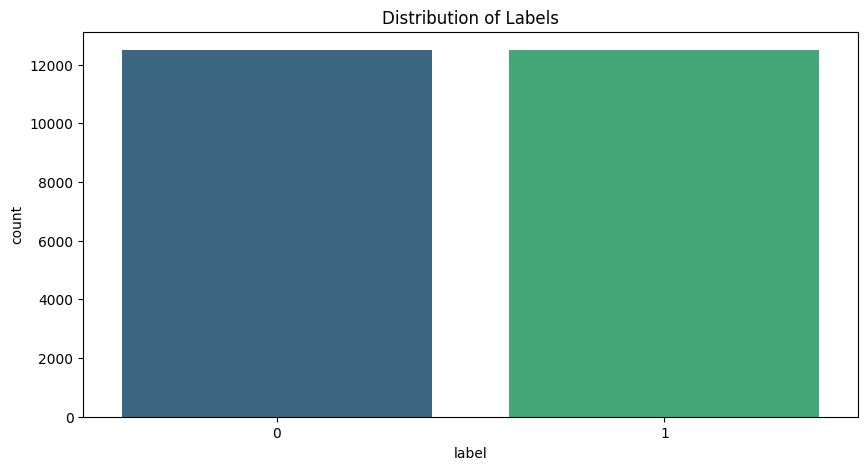

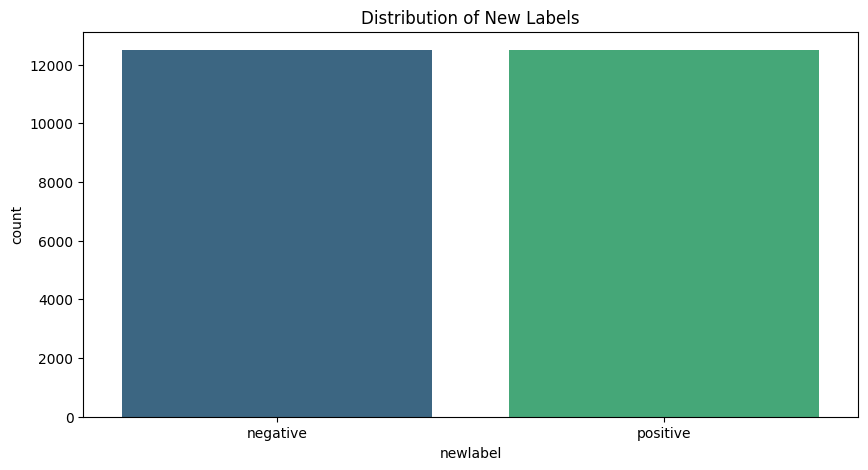

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='label', palette='viridis')
plt.title('Distribution of Labels')
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='newlabel', palette='viridis')
plt.title('Distribution of New Labels')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


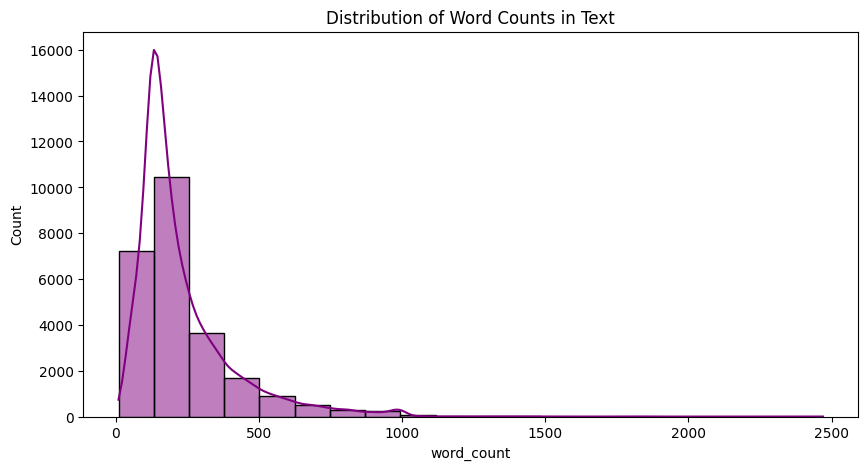

In [ ]:
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))

# Histogram
plt.figure(figsize=(10, 5))
sns.histplot(df['word_count'], kde=True, bins=20, color='purple')
plt.title('Distribution of Word Counts in Text')
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


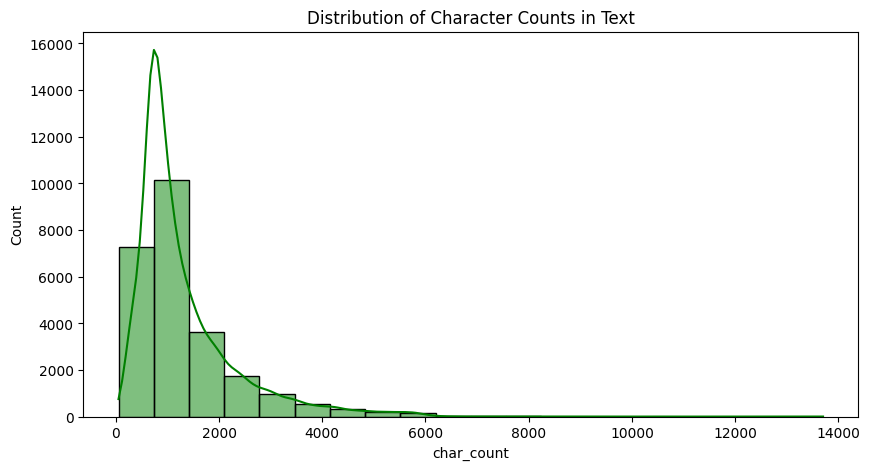

In [ ]:
df['char_count'] = df['text'].apply(lambda x: len(str(x)))

# Histogram
plt.figure(figsize=(10, 5))
sns.histplot(df['char_count'], kde=True, bins=20, color='green')
plt.title('Distribution of Character Counts in Text')
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

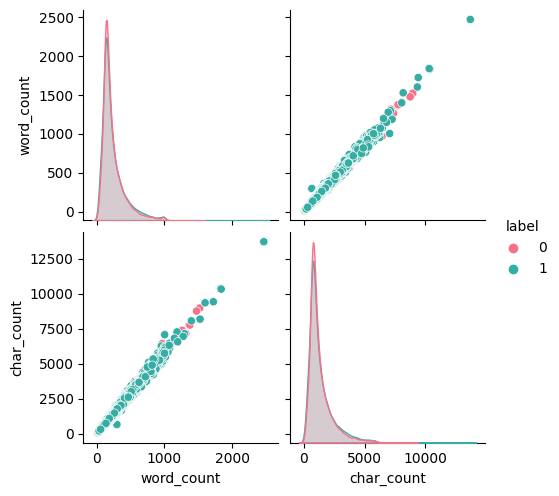

In [ ]:
sns.pairplot(df[['word_count', 'char_count', 'label']], hue='label', palette='husl')
plt.show()

In [ ]:
df.drop(columns=['word_count','char_count'],inplace=True)

In [ ]:
# Get unique pairs of 'label' and 'newlabel'
unique_pairs = df[['label', 'newlabel']].drop_duplicates()

# Display the unique pairs
print(unique_pairs)

       label  newlabel
0          0  negative
12500      1  positive


In [ ]:
df.head()

,text,label,newlabel
0,I rented I AM CURIOUS-YELLOW from my video sto...,0,negative
1,"""I Am Curious: Yellow"" is a risible and preten...",0,negative
2,If only to avoid making this type of film in t...,0,negative
3,This film was probably inspired by Godard's Ma...,0,negative
4,"Oh, brother...after hearing about this ridicul...",0,negative


**PRETRAINED MODEL LOADING WITH TOKENIZERS**

In [ ]:
# Load model directly
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("distilbert/distilbert-base-uncased")

**ENCODING**

In [ ]:
text="Nepal, a small yet diverse country located in South Asia, is known for its breathtaking landscapes and cultural heritage."
encoded_word = tokenizer(text)

In [ ]:
encoded_word

{'input_ids': [101, 8222, 1010, 1037, 2235, 2664, 7578, 2406, 2284, 1999, 2148, 4021, 1010, 2003, 2124, 2005, 2049, 3052, 17904, 12793, 1998, 3451, 4348, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [ ]:
tokens = tokenizer.convert_ids_to_tokens(encoded_word.input_ids)
print(tokens)

['[CLS]', 'nepal', ',', 'a', 'small', 'yet', 'diverse', 'country', 'located', 'in', 'south', 'asia', ',', 'is', 'known', 'for', 'its', 'breath', '##taking', 'landscapes', 'and', 'cultural', 'heritage', '.', '[SEP]']


In [ ]:
ds.reset_format()

In [ ]:
ds

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
})

In [ ]:
def tokenize(batch_data):
  tokenized_data =tokenizer(batch_data['text'], padding=True, truncation=True)
  return tokenized_data

print(tokenize(ds["train"][:5]))

{'input_ids': [[101, 1045, 12524, 1045, 2572, 8025, 1011, 3756, 2013, 2026, 2678, 3573, 2138, 1997, 2035, 1996, 6704, 2008, 5129, 2009, 2043, 2009, 2001, 2034, 2207, 1999, 3476, 1012, 1045, 2036, 2657, 2008, 2012, 2034, 2009, 2001, 8243, 2011, 1057, 1012, 1055, 1012, 8205, 2065, 2009, 2412, 2699, 2000, 4607, 2023, 2406, 1010, 3568, 2108, 1037, 5470, 1997, 3152, 2641, 1000, 6801, 1000, 1045, 2428, 2018, 2000, 2156, 2023, 2005, 2870, 1012, 1026, 7987, 1013, 1028, 1026, 7987, 1013, 1028, 1996, 5436, 2003, 8857, 2105, 1037, 2402, 4467, 3689, 3076, 2315, 14229, 2040, 4122, 2000, 4553, 2673, 2016, 2064, 2055, 2166, 1012, 1999, 3327, 2016, 4122, 2000, 3579, 2014, 3086, 2015, 2000, 2437, 2070, 4066, 1997, 4516, 2006, 2054, 1996, 2779, 25430, 14728, 2245, 2055, 3056, 2576, 3314, 2107, 2004, 1996, 5148, 2162, 1998, 2679, 3314, 1999, 1996, 2142, 2163, 1012, 1999, 2090, 4851, 8801, 1998, 6623, 7939, 4697, 3619, 1997, 8947, 2055, 2037, 10740, 2006, 4331, 1010, 2016, 2038, 3348, 2007, 2014, 3689, 38

In [ ]:
emotions_encoded = ds.map(tokenize, batched=True, batch_size=None)

In [ ]:
emotions_encoded

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 50000
    })
})

In [ ]:
inputs = tokenizer(text, return_tensors='pt')
inputs

{'input_ids': tensor([[  101,  8222,  1010,  1037,  2235,  2664,  7578,  2406,  2284,  1999,
          2148,  4021,  1010,  2003,  2124,  2005,  2049,  3052, 17904, 12793,
          1998,  3451,  4348,  1012,   102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1]])}

In [ ]:
model = AutoModel.from_pretrained("distilbert/distilbert-base-uncased")

with torch.no_grad():
  outputs = model(**inputs)

last_hidden_states = outputs.last_hidden_state

In [ ]:
last_hidden_states

tensor([[[-0.3059, -0.1283, -0.3624,  ..., -0.2410,  0.4227, -0.0053],
         [ 0.7899,  0.1538, -0.5382,  ..., -0.1931,  0.1279, -0.0844],
         [-0.7533,  0.0128, -0.3974,  ..., -0.4165,  0.1512, -0.2359],
         ...,
         [ 0.1849,  0.1164,  0.0151,  ..., -0.1964, -0.2324, -0.5381],
         [ 0.7501, -0.0502, -0.3648,  ...,  0.1962, -0.6372, -0.4919],
         [ 0.0951,  0.0933, -0.1550,  ...,  0.0421, -0.1701, -0.4793]]])

**GETTING AUTOMODEL SEQUENCE CLASSIFICATION**

In [ ]:
num_labels = len(classes)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AutoModelForSequenceClassification.from_pretrained("distilbert/distilbert-base-uncased", num_labels = num_labels).to(device)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert/distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


**SETTING TRAINING ARGS**

In [ ]:

batch_size = 64
model_name = "distilbert-finetuned-emotion_model"

training_args = TrainingArguments(output_dir = model_name,
                                 num_train_epochs=8,
                                  report_to="none",
                                 learning_rate = 2e-5,
                                 per_device_train_batch_size= batch_size,
                                 per_device_eval_batch_size = batch_size,
                                  weight_decay=0.01,
                                  evaluation_strategy = 'epoch',
                                  disable_tqdm=False)

/opt/conda/lib/python3.10/site-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


**DEFINING METRICS**

In [ ]:

def compute_metrics(pred):
  labels = pred.label_ids
  preds = pred.predictions.argmax(-1)
  f1 = f1_score(labels, preds, average='weighted')
  acc = accuracy_score(labels, preds)
  return {"accuracy": acc, "f1": f1}

**CREATING TRAINER**

In [ ]:
trainer = Trainer(model=model, args=training_args,
                  compute_metrics=compute_metrics,
                  train_dataset=emotions_encoded['train'],
                  eval_dataset=emotions_encoded['test'],
                  tokenizer=tokenizer)

/tmp/ipykernel_23/603732864.py:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(model=model, args=training_args,


In [ ]:
# W&B_API_KEY= "PASTE YOUR API KEY HERE.."

**TRAINING STARTED !!**

In [ ]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,No log,0.195322,0.923960,0.923960
2,0.252300,0.208664,0.925000,0.924926
3,0.134900,0.239512,0.926000,0.925924
4,0.078600,0.248725,0.930200,0.930194
5,0.078600,0.282813,0.931320,0.931318
6,0.041300,0.332243,0.929160,0.929124
7,0.024700,0.329335,0.931080,0.931075
8,0.015900,0.338917,0.931520,0.931518


TrainOutput(global_step=3128, training_loss=0.08816693265877111, metrics={'train_runtime': 6978.5117, 'train_samples_per_second': 28.659, 'train_steps_per_second': 0.448, 'total_flos': 2.64934797312e+16, 'train_loss': 0.08816693265877111, 'epoch': 8.0})

In [ ]:
preds_outputs = trainer.predict(emotions_encoded['test'])
preds_outputs.metrics

{'test_loss': 0.3389173746109009,
 'test_accuracy': 0.93152,
 'test_f1': 0.9315178523998513,
 'test_runtime': 207.4776,
 'test_samples_per_second': 120.495,
 'test_steps_per_second': 1.885}

**CONFUSION MATRIX AND OTHER PREDICTI0NS**

In [ ]:
y_preds = np.argmax(preds_outputs.predictions, axis=1)
y_true = emotions_encoded['test'][:]['label']

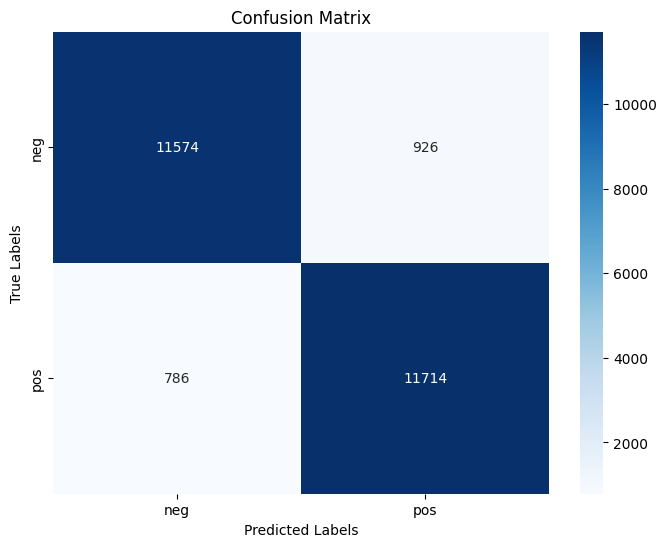

In [ ]:

# Assume `y_true` and `y_preds` are defined
# `classes` is the list of class names
cm = confusion_matrix(y_true, y_preds)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import shutil

# Define the source directory and zip file name
source_dir = "/kaggle/working/distilbert-finetuned-emotion_model/checkpoint-1500"
zip_file = "/kaggle/working/kaggle_working_backup1500"

# Create a zip file of the entire /kaggle/working directory
shutil.make_archive(zip_file, 'zip', source_dir)

print(f"Zipped folder saved as {zip_file}.zip")


Zipped folder saved as /kaggle/working/kaggle_working_backup1500.zip


In [ ]:
!df -h


/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Filesystem        Size  Used Avail Use% Mounted on
overlay           7.9T  6.0T  2.0T  76% /
tmpfs              64M     0   64M   0% /dev
shm                14G   12K   14G   1% /dev/shm
/dev/sda1         122G   26G   97G  21% /opt/bin
/dev/mapper/snap  7.9T  6.0T  2.0T  76% /home/jupyter
/dev/loop1         20G   20G     0 100% /kaggle/lib
tmpfs              16G     0   16G   0% /proc/acpi
tmpfs              16G     0   16G   0% /proc/scsi
tmpfs              16G     0   16G   0% /sys/firmware


**FINDING BEST CHECKPOINTS MDOEL OUT OF 3.**

In [ ]:
import torch
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification

# Define paths to checkpoints
checkpoints = [
    "/kaggle/working/distilbert-finetuned-emotion_model/checkpoint-500",
    "/kaggle/working/distilbert-finetuned-emotion_model/checkpoint-1000",
    "/kaggle/working/distilbert-finetuned-emotion_model/checkpoint-1500",
    "/kaggle/working/distilbert-finetuned-emotion_model/checkpoint-2000",
    "/kaggle/working/distilbert-finetuned-emotion_model/checkpoint-2500",
    "/kaggle/working/distilbert-finetuned-emotion_model/checkpoint-3000",
    "/kaggle/working/distilbert-finetuned-emotion_model/checkpoint-3128"
]

# Validation dataset (example: text and labels)
validation_texts = [
    "I feel so happy today!",
    "This is so frustrating.",
    "I'm just feeling okay.",
    "Wow, what an amazing day, but I'm so exhausted!"
]
validation_labels = [2, 3, 1, 2]  # Replace with your actual label indices

# Evaluate each checkpoint
results = {}
for checkpoint in checkpoints:
    # Load model and tokenizer
    tokenizer = DistilBertTokenizer.from_pretrained(checkpoint)
    model = DistilBertForSequenceClassification.from_pretrained(checkpoint)
    model.eval()

    # Prepare data
    inputs = tokenizer(validation_texts, return_tensors="pt", truncation=True, padding=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)

    # Get predictions
    predictions = torch.argmax(outputs.logits, dim=-1).tolist()
    accuracy = accuracy_score(validation_labels, predictions)

    # Store results
    results[checkpoint] = accuracy

# Find best checkpoint
best_checkpoint = max(results, key=results.get)
print("Validation Results:", results)
print("Best Checkpoint:", best_checkpoint)


Validation Results: {'/kaggle/working/distilbert-finetuned-emotion_model/checkpoint-500': 0.0, '/kaggle/working/distilbert-finetuned-emotion_model/checkpoint-1000': 0.0, '/kaggle/working/distilbert-finetuned-emotion_model/checkpoint-1500': 0.25, '/kaggle/working/distilbert-finetuned-emotion_model/checkpoint-2000': 0.0, '/kaggle/working/distilbert-finetuned-emotion_model/checkpoint-2500': 0.0, '/kaggle/working/distilbert-finetuned-emotion_model/checkpoint-3000': 0.0, '/kaggle/working/distilbert-finetuned-emotion_model/checkpoint-3128': 0.0}
Best Checkpoint: /kaggle/working/distilbert-finetuned-emotion_model/checkpoint-1500


**INFERENCING FINE TUNED MODEL**

In [ ]:
import shutil

# Source directory
source_dir = '/kaggle/working/distilbert-finetuned-emotion_model'

# Output zip file
output_zip = '/kaggle/working/distilbert-finetuned-emotion_model.zip'

# Create a zip file
shutil.make_archive(base_name=output_zip.replace('.zip', ''), format='zip', root_dir=source_dir)

print(f"Zipped directory is saved at {output_zip}")

**NOW, TESTING ON REAL TEXT**

In [2]:
import torch
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification

# Path to the saved model and tokenizer
model_path = "/kaggle/working/distilbert-finetuned-emotion_model/checkpoint-1000"

# Load tokenizer and model
tokenizer = DistilBertTokenizer.from_pretrained(model_path)
model = DistilBertForSequenceClassification.from_pretrained(model_path)

# Ensure the model is in evaluation mode
model.eval()

texts = [
    "I am happy but also a bit nervous about tomorrow.",
    "This is the worst thing ever, but I guess it could have been worse.",
    "I feel okay, not great, but not terrible either.",
    "Wow, what an amazing day, but I'm so exhausted!",
    "I'm furious but also strangely relieved that it's over."
]

# Tokenize the input text
inputs = tokenizer(texts, padding=True, truncation=True, return_tensors="pt", max_length=512)

# Perform inference
with torch.no_grad():
    outputs = model(**inputs)

# Get the logits (raw model outputs)
logits = outputs.logits

probabilities = torch.nn.functional.softmax(logits, dim=-1)

# Get predicted class labels
predicted_classes = torch.argmax(probabilities, dim=-1)

# Print results
for text, probs, label in zip(texts, probabilities, predicted_classes):
    print(f"Text: {text}")
    print(f"Predicted Emotion Label: {label.item()}")
    print(f"Probabilities: {probs.numpy()}\n")

In [ ]:
import torch
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification

# Path to the saved model and tokenizer
model_path = "/kaggle/working/distilbert-finetuned-emotion_model/checkpoint-1000"

# Load tokenizer and model
tokenizer = DistilBertTokenizer.from_pretrained(model_path)
model = DistilBertForSequenceClassification.from_pretrained(model_path)

# Ensure the model is in evaluation mode
model.eval()

# Your input texts
texts = [
    "I am happy but also a bit nervous about tomorrow.",
    "This is the worst thing ever, but I guess it could have been worse.",
    "I feel okay, not great, but not terrible either.",
    "Wow, what an amazing day, but I'm so exhausted!",
    "I'm furious but also strangely relieved that it's over."
]

# Mapping of class indices to labels
label_map = {
    0: "sadness",
    3: "anger",
    2: "love",
    5: "surprise",
    4: "fear",
    1: "joy"
}

# Tokenize the input text
inputs = tokenizer(texts, padding=True, truncation=True, return_tensors="pt", max_length=512)

# Perform inference
with torch.no_grad():
    outputs = model(**inputs)

# Get the logits (raw model outputs)
logits = outputs.logits

# Convert logits to probabilities (softmax)
probabilities = torch.nn.functional.softmax(logits, dim=-1)

# Get top 3 predicted class labels for each text
top_k = 3  # Top 3 classes
top_probs, top_labels = torch.topk(probabilities, top_k, dim=-1)

# Print results for each text
for text, probs, labels in zip(texts, top_probs, top_labels):
    print(f"Text: {text}")
    print("Top 3 Predicted Emotions with Probabilities:")
    for prob, label in zip(probs, labels):
        print(f"  {label_map[label.item()]}: {prob.item():.4f}")
    print("\n")
